# STEP 2: Exploratory Data Analysis of Raw Results

This script performs an initial analysis of the raw results, focusing on
metadata (duration, size, tokens) to extract preliminary insights before
the formal quality evaluation.

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [28]:
# Load the raw results file generated in Step 1
RAW_DATA_FILE = 'raw_results.csv'

In [29]:
df = pd.read_csv(RAW_DATA_FILE)
print(f"File '{RAW_DATA_FILE}' loaded. Total of {len(df)} samples")

File 'raw_results.csv' loaded. Total of 9600 samples


In [30]:
# Basic cleaning: remove rows where the response was not generated
df.dropna(subset=['response'], inplace=True)
df['response_length'] = df['response'].str.len()
print("Column 'response_length' (response size) calculated.")
print(f'Total of {len(df)} samples')

Column 'response_length' (response size) calculated.
Total of 9600 samples


## Analysis 1: Factors influencing response duration

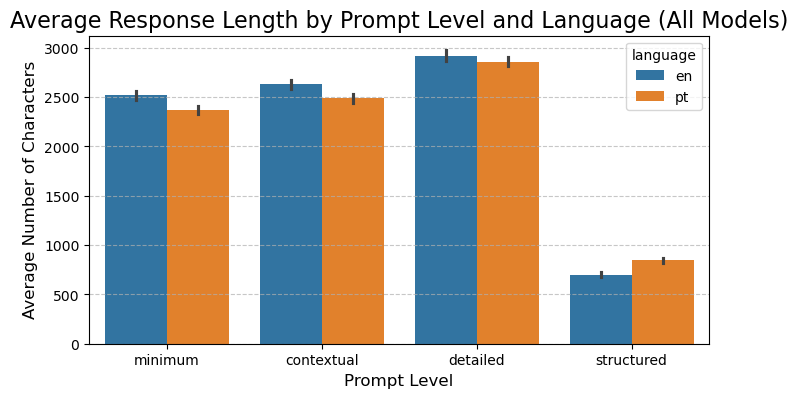

In [31]:
plt.figure(figsize=(8, 4))
sns.barplot(
    data=df,
    x='prompt_level',
    y='response_length',
    hue='language',
    order=['minimum', 'contextual', 'detailed', 'structured']
)
plt.title('Average Response Length by Prompt Level and Language (All Models)', fontsize=16)
plt.ylabel('Average Number of Characters', fontsize=12)
plt.xlabel('Prompt Level', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**Insight Preliminar:** A especificidade do prompt tem efeitos diferentes na verbosidade da resposta. Prompts detalhados aumentam significativamente o comprimento médio das respostas, enquanto prompts estruturados (Few-Shot), ao fornecerem um exemplo de concisão, levam os modelos a gerar respostas mais curtas e focadas.

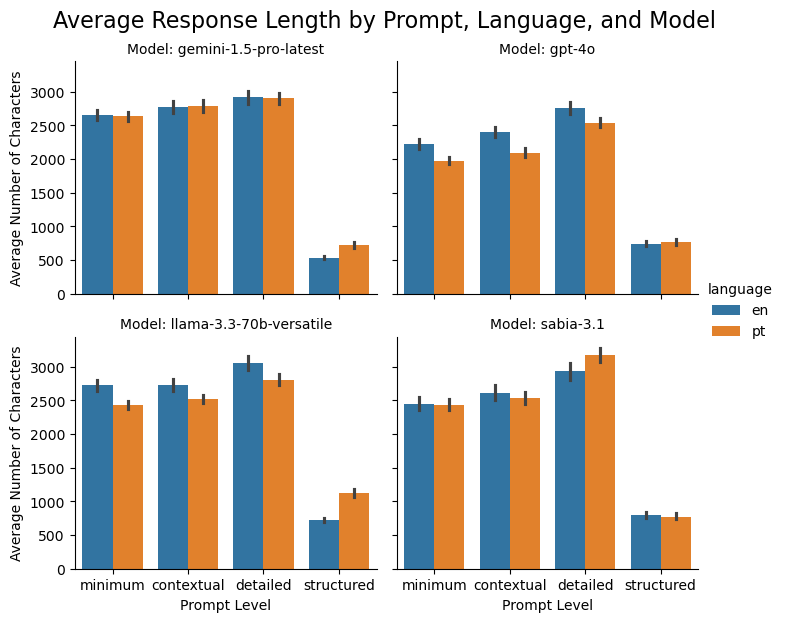

In [32]:
g = sns.catplot(
    data=df,
    x='prompt_level',
    y='response_length',
    hue='language',
    col='model',
    kind='bar',
    order=['minimum', 'contextual', 'detailed', 'structured'],
    col_wrap=2,
    height=3,
    aspect=1.2
)
g.fig.suptitle('Average Response Length by Prompt, Language, and Model', y=1.03, fontsize=16)
g.set_axis_labels("Prompt Level", "Average Number of Characters")
g.set_titles("Model: {col_name}")
plt.show()

**Insight Preliminar:** A forma como a verbosidade varia entre os idiomas é uma característica de cada modelo. O gemini-1.5-pro e o llama-3.3-70b mostram as maiores discrepâncias, com ambos a gerar respostas mais longas em português. Já o gpt-4o e o sabia-3.1 são mais equilibrados, gerando respostas de comprimento muito semelhante em ambos os idiomas.

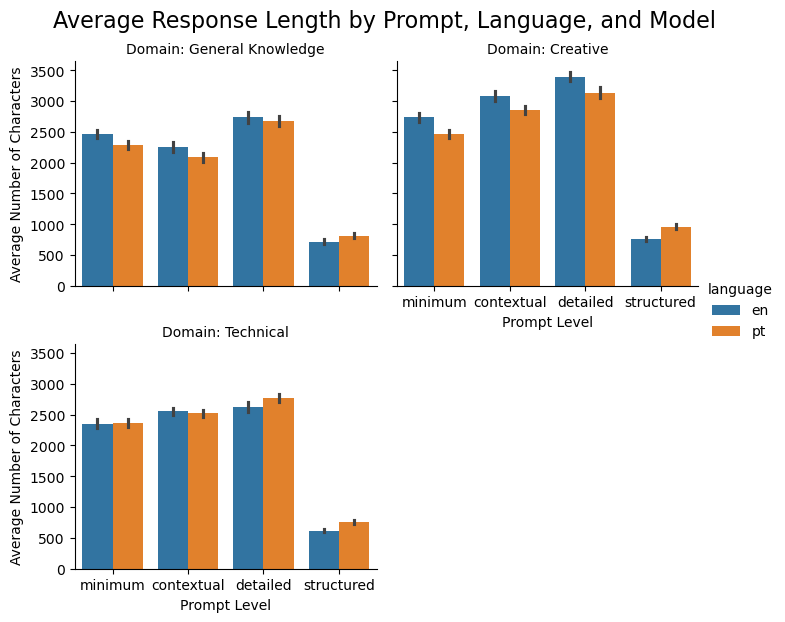

In [33]:
g = sns.catplot(
    data=df,
    x='prompt_level',
    y='response_length',
    hue='language',
    col='domain',
    kind='bar',
    order=['minimum', 'contextual', 'detailed', 'structured'],
    col_wrap=2,
    height=3,
    aspect=1.2
)
g.fig.suptitle('Average Response Length by Prompt, Language, and Model', y=1.03, fontsize=16)
g.set_axis_labels("Prompt Level", "Average Number of Characters")
g.set_titles("Domain: {col_name}")
plt.show()

**Insight Preliminar:** O tipo de tarefa (domínio) tem um impacto no comprimento da resposta. O domínio Creative (Criativo) gera, consistentemente, as respostas mais longas, seguido pelo Technical (Técnico) e, por último, o General Knowledge (Conhecimento Geral). Além disso, a maior diferença de verbosidade entre o inglês (azul) e o português (laranja) ocorre no domínio Criativo.

* As respostas estruturadas, apesar de serem significativamente mais curtas, têm uma qualidade (precisão, completude) maior do que as respostas detalhadas, que são mais longas?

* A maior verbosidade em certos modelos traduz-se em maior qualidade ou apenas em mais texto para transmitir a mesma informação?

* O domínio Criativo, que gera as respostas mais longas, também produz as respostas de maior qualidade, ou a sua natureza aberta leva a mais erros?

* Existe uma correlação direta entre o custo em tokens de uma resposta e a sua nota de qualidade final?

## Analysis 2: Response Duration by Model

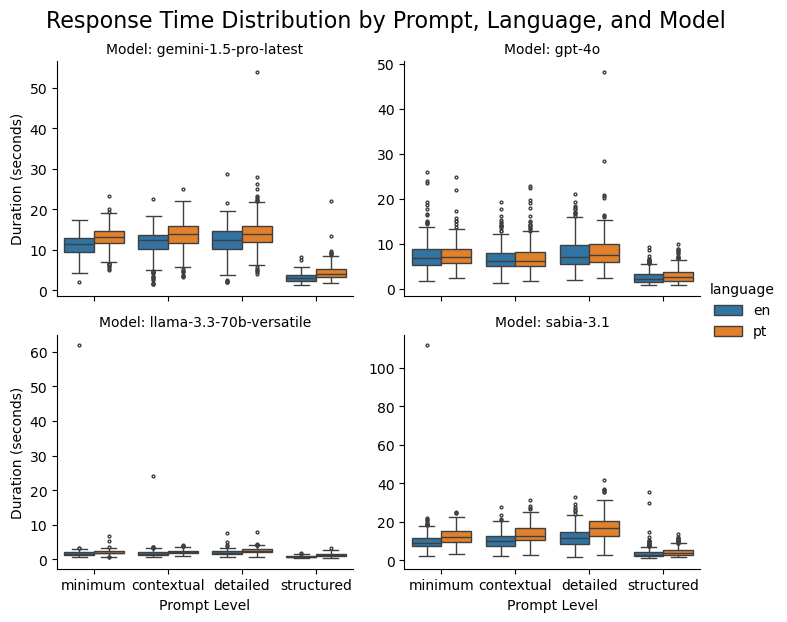

In [34]:
g = sns.catplot(
    data=df,
    x='prompt_level',
    y='duration_s',
    hue='language',
    col='model',
    kind='box',
    order=['minimum', 'contextual', 'detailed', 'structured'],
    col_wrap=2,
    height=3,
    aspect=1.2,
    fliersize=2,
    sharey=False,
)
g.fig.suptitle('Response Time Distribution by Prompt, Language, and Model', y=1.03, fontsize=16)
g.set_axis_labels("Prompt Level", "Duration (seconds)")
g.set_titles("Model: {col_name}")
plt.show()

**Insight Preliminar:** Embora a escolha do modelo seja o fator dominante na velocidade, a especificidade do prompt também tem um impacto observável. Prompts structured (que usam Few-Shot) não só geram respostas mais curtas, como também são processados significativamente mais rápido do que os prompts detailed, mais abertos. Isto sugere que fornecer ao modelo um exemplo de resposta concisa não só foca o conteúdo, como também otimiza a sua trajetória de geração, reduzindo a sobrecarga computacional necessária para "dissertar" sobre um tópico.

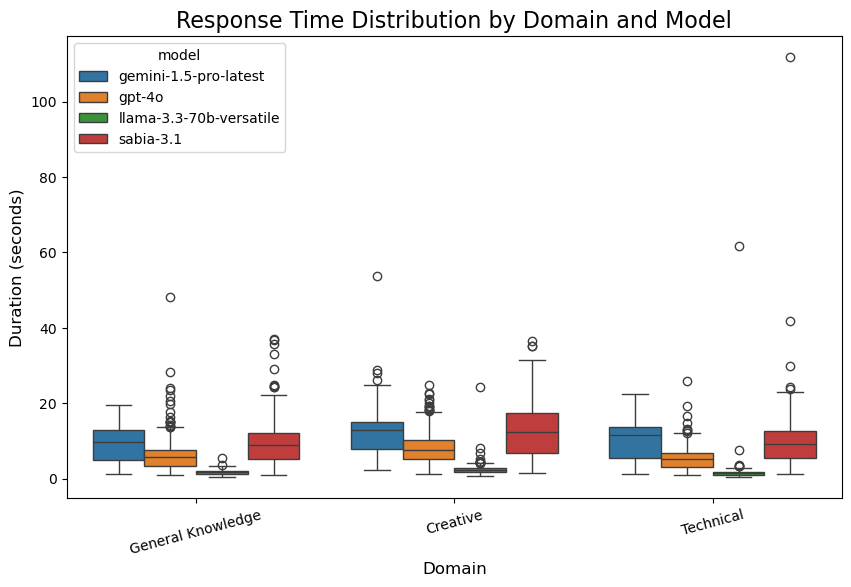

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='domain',
    y='duration_s',
    hue='model',
)
plt.title('Response Time Distribution by Domain and Model', fontsize=16)
plt.ylabel('Duration (seconds)', fontsize=12)
plt.xlabel('Domain', fontsize=12)
plt.xticks(rotation=15)
plt.show()

**Insight Preliminar:** Tarefas mais abertas e menos definidas, como as do domínio Criativo, parecem exigir um "esforço computacional" mais variável dos modelos, levando a tempos de resposta mais imprevisíveis. Em contraste, tarefas mais factuais (General Knowledge) ou com uma estrutura de resposta mais esperada (Technical) resultam em uma latência mais consistente.

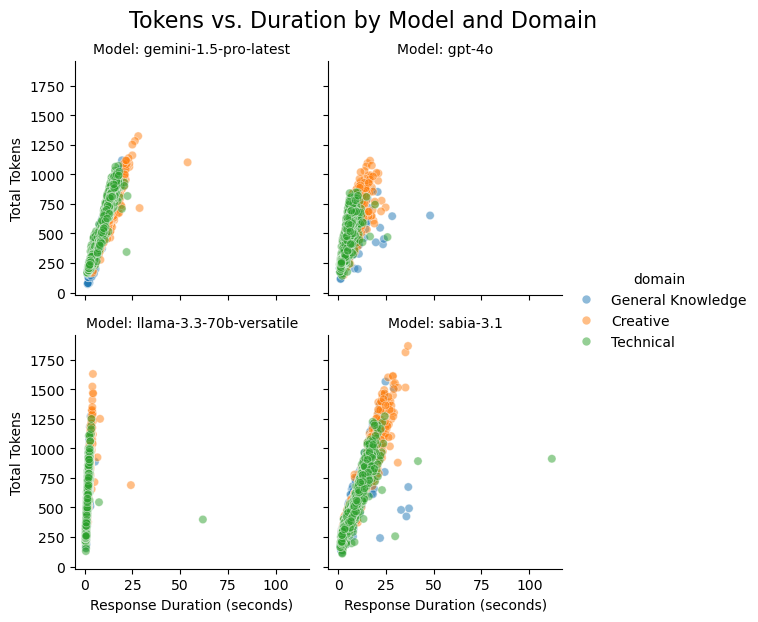

In [44]:
g = sns.relplot(
    data=df,
    x="duration_s",
    y="total_tokens",
    hue="domain",
    col="model",
    col_wrap=2,
    kind="scatter",
    alpha=0.5,
    height=3,
)
g.fig.suptitle('Tokens vs. Duration by Model and Domain', y=1.03, fontsize=16)
g.set_axis_labels("Response Duration (seconds)", "Total Tokens")
g.set_titles("Model: {col_name}")
plt.show()

**Insight Preliminar:** Modelos que "pensam" mais tempo (Duração maior) também consomem mais recursos computacionais (Tokens maior). A latência e o custo não são fatores independentes; eles estão diretamente correlacionados e tarefas que requerem mais "raciocínio" ou geração de conteúdo novo (criativo/técnico) consomem mais tempo e mais tokens do que tarefas de recuperação de informação factual.

* A maior velocidade e concisão das respostas structured (estruturadas) vêm ao custo da perda de informação relevante, ou elas são realmente mais eficientes em transmitir a mesma qualidade em menos tempo?

* A maior variabilidade de tempo de resposta no domínio creative (criativo) está correlacionada com uma maior variabilidade também na qualidade das respostas?

## Analysis 3: Token Usage

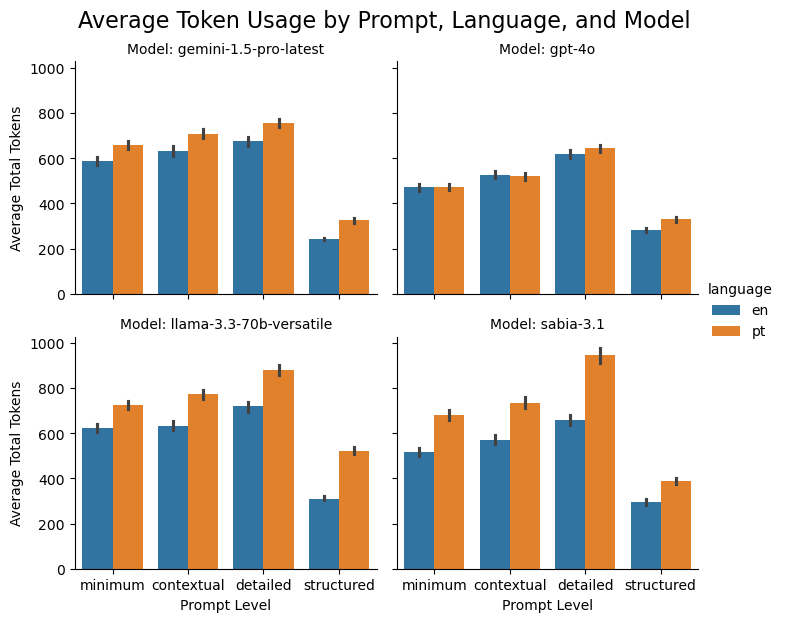

In [36]:
g = sns.catplot(
    data=df,
    x='prompt_level',
    y='total_tokens',
    hue='language',
    col='model',
    kind='bar',
    order=['minimum', 'contextual', 'detailed', 'structured'],
    col_wrap=2,
    height=3,
    aspect=1.2
)
g.fig.suptitle('Average Token Usage by Prompt, Language, and Model', y=1.03, fontsize=16)
g.set_axis_labels("Prompt Level", "Average Total Tokens")
g.set_titles("Model: {col_name}")
plt.show()

**Insight Preliminar:** Existe uma relação quase linear entre o comprimento da resposta e o número de tokens consumidos. Em quase todos os modelos e para todos os níveis de prompt, a barra laranja (português) é mais alta do que a barra azul (inglês). Isto significa que, para gerar uma resposta com um nível de detalhe semelhante, os modelos tendem a usar mais tokens em português.

* As respostas estruturadas (structured), que são as mais baratas em termos de tokens, conseguem transmitir a mesma quantidade de informação útil e ter a mesma qualidade que as respostas detalhadas (detailed), que são as mais caras?

* O facto de o português ser um idioma consistentemente mais "caro" em termos de tokens afeta a qualidade da resposta? Ou seja, os modelos são tão bons em português quanto em inglês, apenas precisam de mais "espaço" (tokens) para se expressarem pelo português ter uma maior variedade de conjugações verbais, acentos e contrações?

* O modelo que consome mais tokens para uma determinada tarefa é, de facto, o que gera a resposta de melhor qualidade? Ou existe um modelo mais "eficiente" que consegue resultados semelhantes com um custo menor?